<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Introduction </h1></div>



![](https://www.labotec.co.za/wp-content/uploads/2016/07/finance-banner.png)
#### [Image Source](https://www.labotec.co.za/wp-content/uploads/2016/07/finance-banner.png)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Libraries </h1>
</div>


In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.stats import norm, boxcox
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter
from scipy import stats
from tqdm import tqdm_notebook
import warnings
warnings.simplefilter(action='ignore', category=Warning)


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Dataset </h1>
</div>


In [2]:
dataset = pd.read_csv('../input/defaulter/credit_card_defaulter.csv')


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Exploratory Data Analysis </h1>
</div>


In [3]:
dataset.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [5]:
dataset.shape

(10000, 4)

In [6]:
dataset.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
balance,10000.000000,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308387,2654.322576
income,10000.000000,33516.981876,13336.639563,771.967729,21340.462905,34552.644800,43807.729275,73554.233500


In [7]:
dataset.isnull().values.any()

False



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Countplot for Default</h2>
</div>


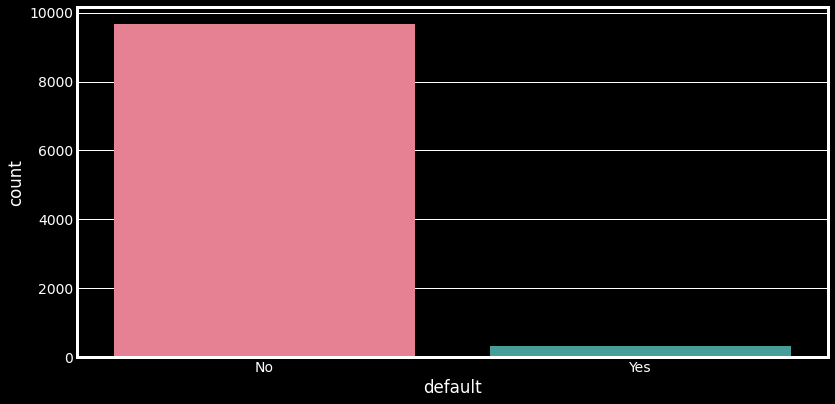

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x="default", data=dataset, palette='husl');



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Countplot for Student</h2>
</div>


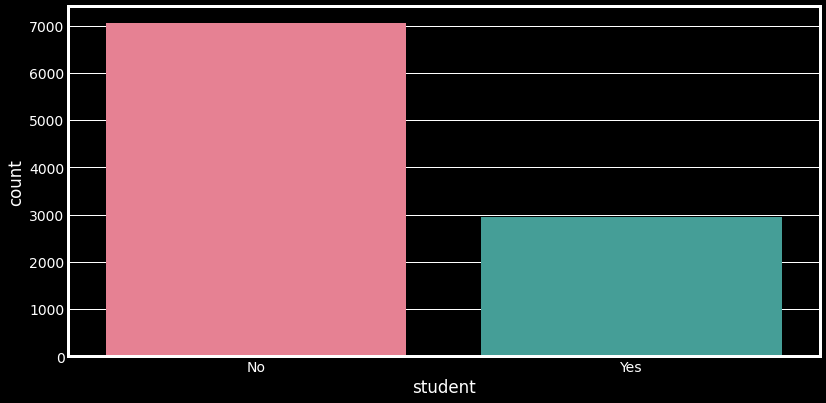

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x="student", data=dataset, palette='husl');

In [10]:
cols = ['balance', 'income']

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Box Plots</h2>
</div>


Your Charts are being ready:   0%|          | 0/2 [00:00<?, ?it/s]

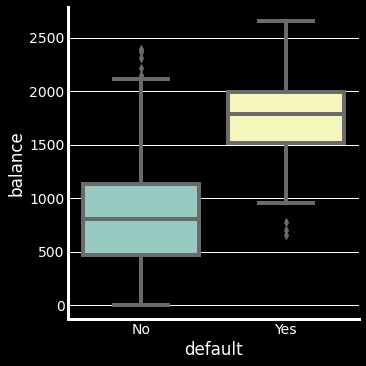

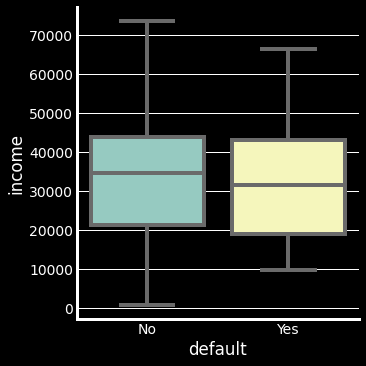

In [11]:
def boxPlotter(dataset, columnName):
    """
    Plots boxplots for column given as parameter.
    """
    sns.catplot(x="default", y=columnName, data=dataset, kind="box");
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
    boxPlotter(dataset, column)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pie Chart</h2>
</div>



In [12]:
def pieChartPlotter(dataset, columnName):
    """
    Creates pie chart of the column given as parameter in the dataset
    """
    values = dataset[columnName].value_counts()
    labels = dataset[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

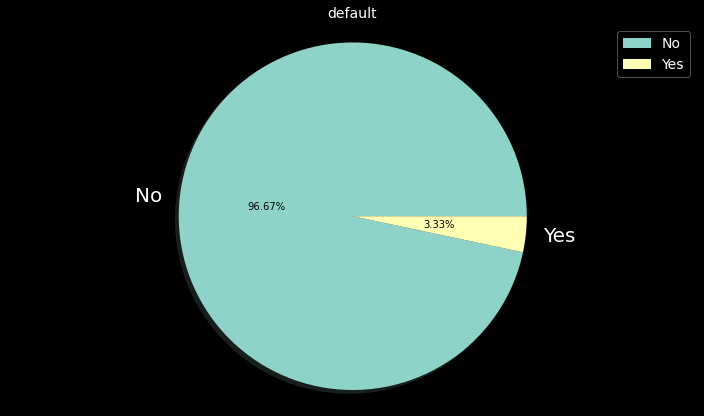

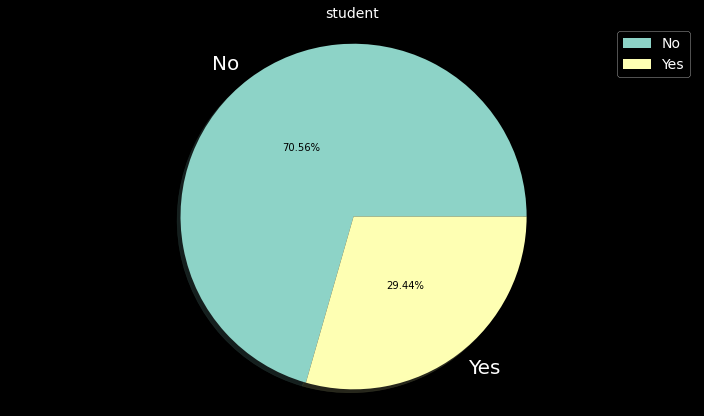

In [13]:
pieChartPlotter(dataset, 'default') 
pieChartPlotter(dataset, 'student') 



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Correlation Plot</h2>
</div>

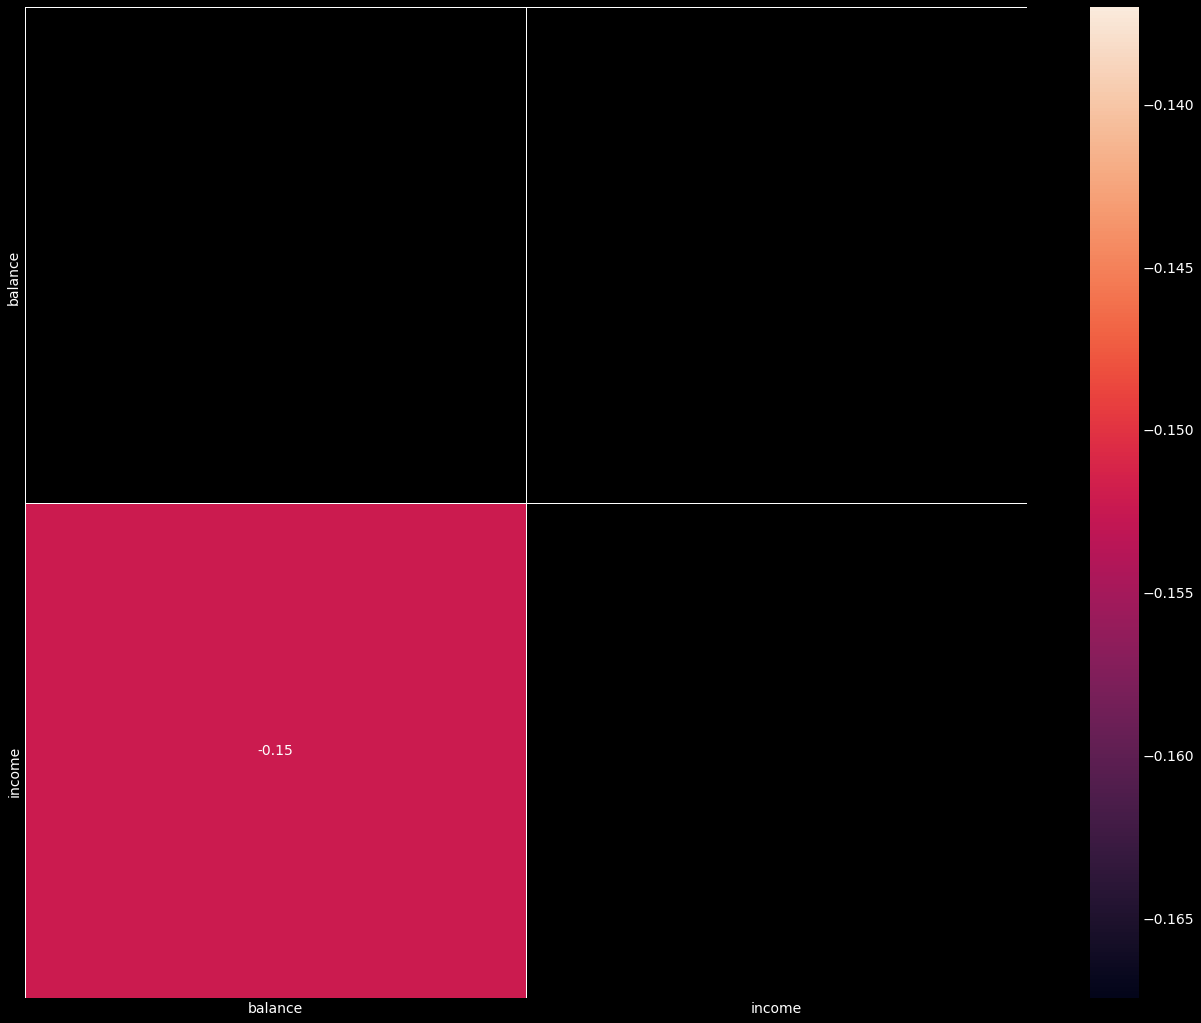

In [14]:
plt.figure(figsize=(20, 17))
matrix = np.triu(dataset.corr())
sns.heatmap(dataset.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Some Distribution Plots</h2>
</div>


In [15]:
def distributionPlot(dataset):
    """ 
    Creates distribution plot.
    """
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(dataset.columns)), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(dataset.columns)/3), 3, i+1)
        sns.distplot(
            dataset.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

In [16]:
plot_data = dataset.drop(columns=['default', 'student'], axis =1)

Your plots are being ready:   0%|          | 0/2 [00:00<?, ?it/s]

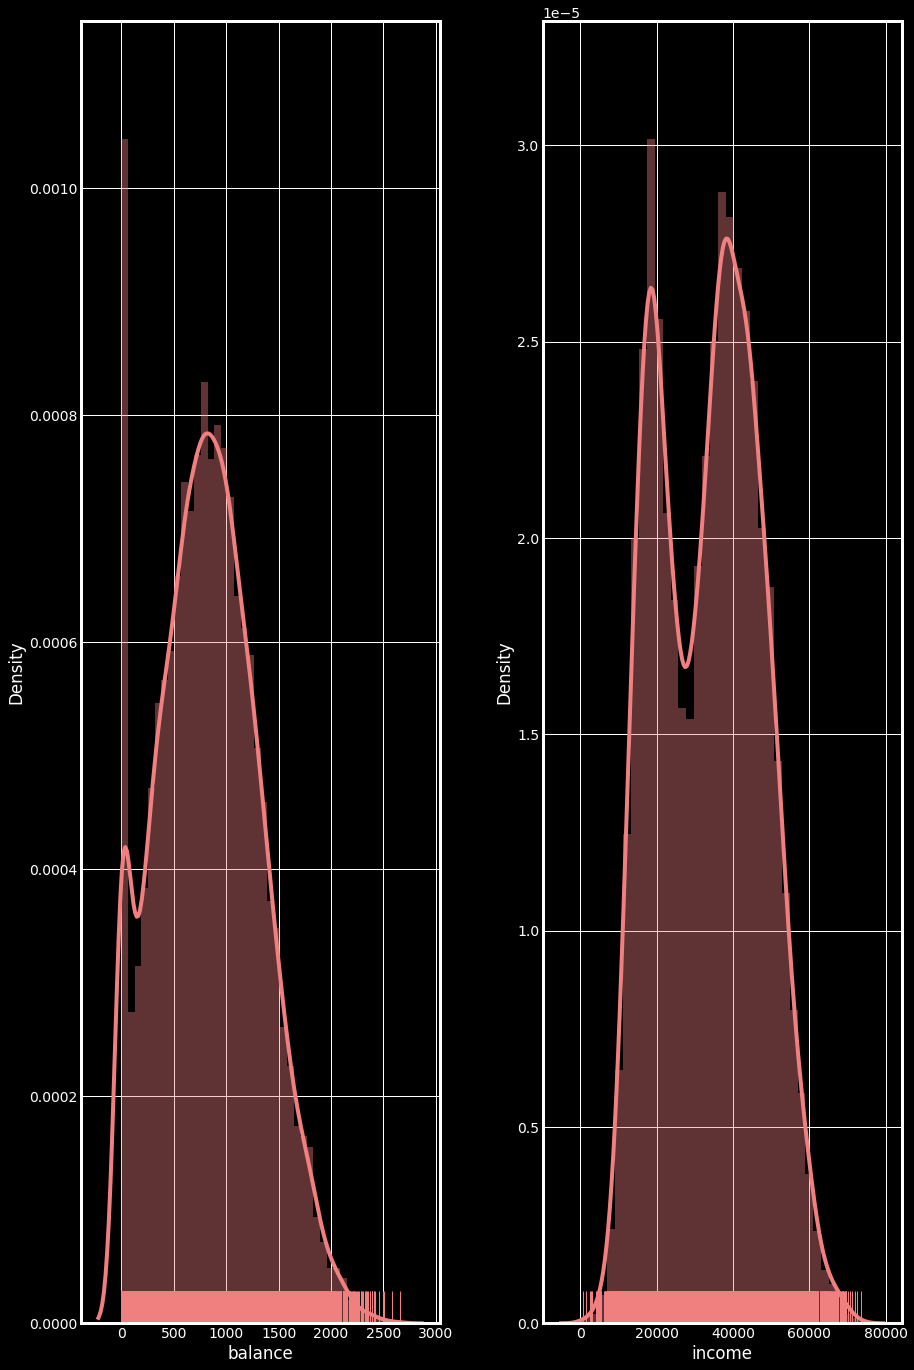

In [17]:
distributionPlot(plot_data)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Pairplots</h2>
</div>



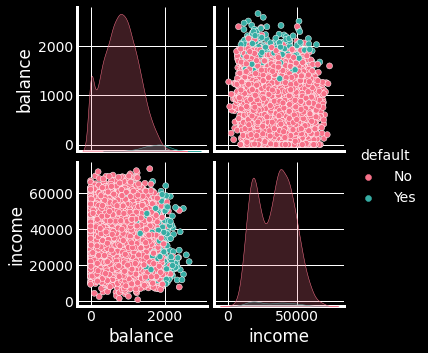

In [18]:
sns.pairplot(dataset, hue="default", palette="husl");

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h4 style="text-align:left;">From above charts we can confirm</h4>
<p style="text-align:left;">1) There seems to be very less correlation between all the features.
    <br>
2) 'income' column is skewed. So, lets correct it</p>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight:bold">Data Preprocessing</h1>
</div>





<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Skewness Correction</h2>
</div>



In [19]:
def skewnessCorrector(dataset,columnName):
    import seaborn as sns
    from scipy import stats
    from scipy.stats import norm, boxcox
    """
    This function returns two plots distplot and probability plot for non-normalized data and after normalizing the provided data. 
    Just provide it with two parameters dataset and the name of column.
    It corrects the skewness of data applying Boxcox transformation on the provided data
    """
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()
    # Applying BoxCox Transformation
    dataset[columnName], lam_fixed_acidity = boxcox(
        dataset[columnName])
    
    print('''After Correcting''')
    (mu, sigma) = norm.fit(dataset[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(dataset[columnName], fit=norm, color="orange");
    plt.title(columnName.capitalize() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[columnName], plot=plt)
    plt.show()
    return dataset

Before Correcting
Mu before correcting Income : 33516.98187595744, Sigma before correcting Income : 13335.972714082134


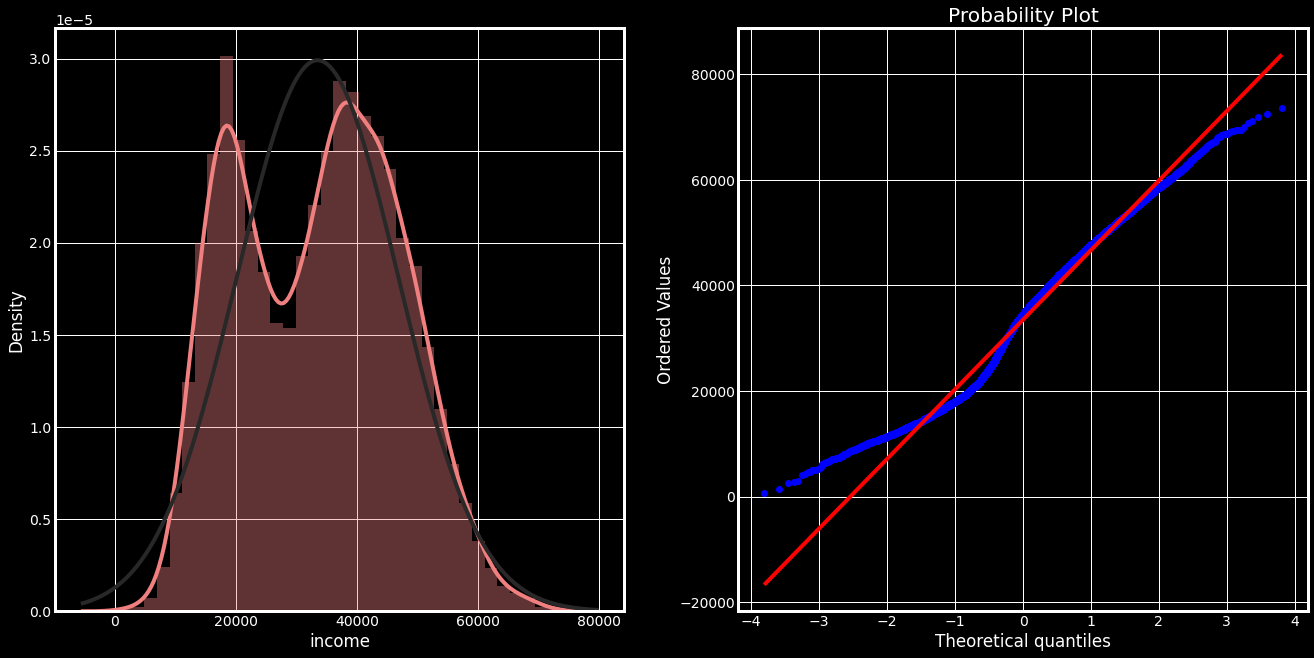

After Correcting
Mu after correcting Income : 2772.5015528811628, Sigma after correcting Income : 837.7283003658491


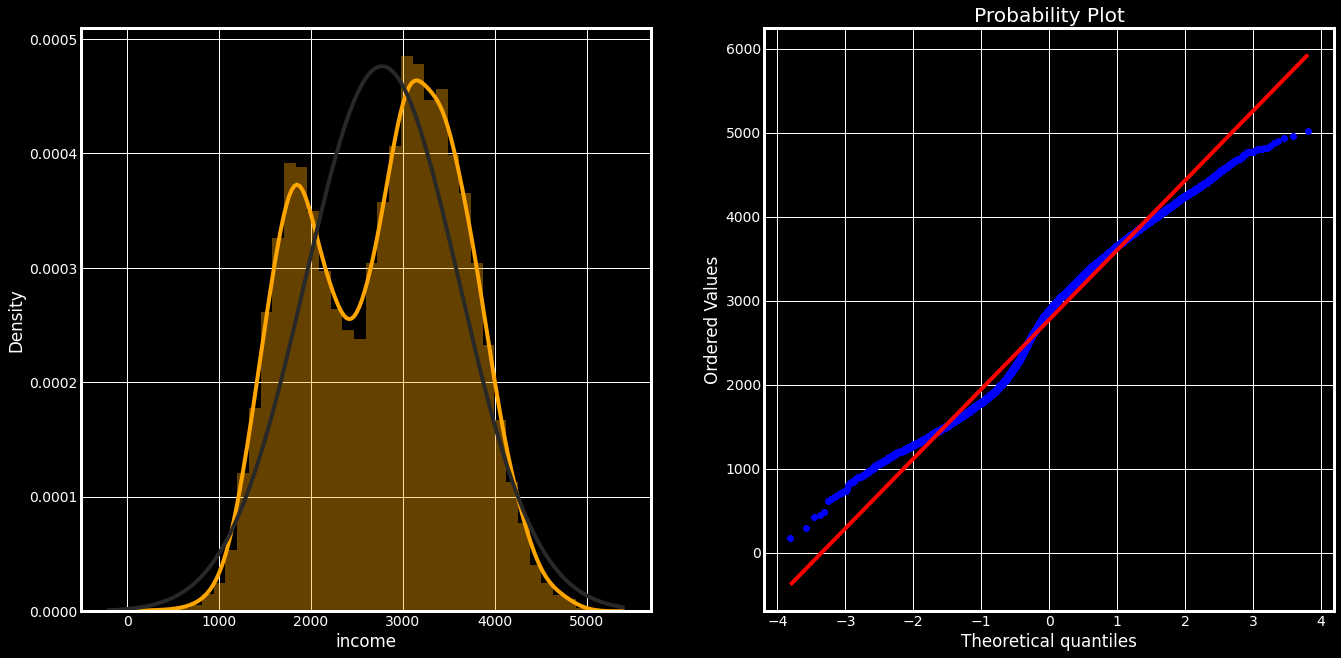

In [20]:
skewedColumns = ['income']
for column in skewedColumns:
    skewnessCorrector(dataset,column)

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h3 style="text-align:center;" >Above function's 
<a href="https://github.com/d4rk-lucif3r/EasifyML">Github Repo</a></h3>

</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Preparing Features and labels </h2>
</div>



In [21]:
features = dataset.iloc[:, 1:]
labels = dataset.iloc[:, 1]

In [22]:
features , labels

(     student      balance       income
 0         No   729.526495  3462.853131
 1        Yes   817.180407  1336.483851
 2         No  1073.549164  2711.037084
 3         No   529.250605  2953.452255
 4         No   785.655883  3119.055727
 ...      ...          ...          ...
 9995      No   711.555020  3944.731862
 9996      No   757.962918  1907.134487
 9997      No   845.411989  4248.428661
 9998      No  1569.009053  3011.727933
 9999     Yes   200.922183  1704.133829
 
 [10000 rows x 3 columns],
 0        No
 1       Yes
 2        No
 3        No
 4        No
        ... 
 9995     No
 9996     No
 9997     No
 9998     No
 9999    Yes
 Name: student, Length: 10000, dtype: object)

In [23]:
features.shape, labels.shape

((10000, 3), (10000,))



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Model training</h1>
</div>




In [24]:
print(u'\u2713','helloe')
print('[]')

✓ helloe
[]


In [25]:
accuracy_scores ={}
def predictor(features, labels, predictor ='lr', params={}, tune = False, test_size = .2, cv_folds =10, random_state =42):
    global accuracy_scores
    """
    Applies SMOTE , Splits the features and labels in training and validation sets with test_size = .2 , scales X_train, X_val using StandardScaler.
    Fits every model on training set and predicts results find and plots Confusion Matrix, 
    finds accuracy of model applies K-Fold Cross Validation 
    and stores its accuracies in a dictionary containing Model name as Key and accuracies as values and returns it
    Applies GridSearch Cross Validation and gives best params out from param list.
    
    Parameters:
        features : array 
                    features array
                    
        lables : array
                    labels array
                    
        predictor : str
                    Predicting model to be used
                    Default 'lr'
                         Predictor Strings:
                            lr - Logisitic Regression
                            svm -SupportVector Machine
                            knn - K-Nearest Neighbours
                            dt - Decision Trees
                            nb - GaussianNaive bayes
                            rfc- Random Forest Classifier
        params : dict
                    contains parameters for model
        tune : boolean  
                when True Applies GridSearch CrossValidation   
                Default is False
            
        test_size: float or int, default=.2
                    If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to 
                    include in the test split. If int, represents the absolute number of test samples. 
        cv_folds : int
                No. of cross validation folds. Default = 10
    EX: 
      For Logistic Regression
            predictor
                (
                    features = features, 
                    labels = labels, 
                    predictor = 'lr', 
                    {'penalty': 'l1', 'solver': 'liblinear'}, 
                    tune = True, 
                    test_size = .25
                )
    
    """
    print('Checking if labels or features are categorical! [*]\n')
    cat_features=[i for i in features.columns if features.dtypes[i]=='object']
    if len(cat_features) == 1 :
        print('Features are Categorical\n')
        # Encoding the Independent Variable
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        le = LabelEncoder()
        print('Encoding Features [*]\n')
        features[cat_features]= le.fit_transform(features[cat_features])
        print('Encoding Features Done [',u'\u2713',']\n')
    if labels.dtype == 'O':
        from sklearn.preprocessing import LabelEncoder, OneHotEncoder
        le = LabelEncoder()
        print('Labels are Categorical [*] \n')
        print('Encoding Labels \n')
        labels = le.fit_transform(labels)
        print('Encoding Labels Done [',u'\u2713',']\n')
    
    print('Applying SMOTE [*]\n')
    from imblearn.over_sampling import SMOTE
    sm=SMOTE(k_neighbors=4)
    features,labels=sm.fit_resample(features,labels)
    print('SMOTE Done [',u'\u2713',']\n')
    
    print('Splitting Data into Train and Validation Sets [*]\n')
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size= test_size, random_state= random_state)
    print('Splitting Done [',u'\u2713',']\n')
    
    print('Scaling Training and Test Sets [*]\n')
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_val = sc.transform(X_val)
    print('Scaling Done [',u'\u2713',']\n')
    
     
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set [*]\n')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)
        parameters= [{
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C' : np.logspace(-4, 4, 20),
        }]

    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set [*]\n')
        from sklearn.svm import SVC
        classifier = SVC(**params)
        parameters = [
            {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'C' : np.logspace(-4, 4, 20)},
            {'kernel': ['linear'],'gamma': [1e-3, 1e-4,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'C' : np.logspace(-4, 4, 20)},
            {'kernel': ['poly'], 'gamma': [1e-3, 1e-4,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'C' : np.logspace(-4, 4, 20)},
            {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'C' : np.logspace(-4, 4, 20)},
                     ]
    elif predictor == 'knn':
        print('Training K-Nearest Neighbours on Training Set [*]\n')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)
        parameters = [{
            'n_neighbors': list(range(0,31)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_jobs': [1, 0, None]
        }]

    elif predictor == 'dt':
        print('Training Decision Tree Classifier on Training Set [*]\n')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)
        parameters= [{
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_features': [2, 3],
            'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],

        }]
    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set [*]\n')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)
        
    elif predictor == 'rfc':
        print('Training Random Forest Classifier on Training Set [*]\n')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)
        parameters = [{
            'criterion': ['gini', 'entropy'],
            'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000],
            'bootstrap': [True,False],
            'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            'max_features': [2, 3],
            'min_samples_leaf': [3, 4, 5],
            'min_samples_split': [8, 10, 12],
        }]
    elif predictor == 'xgb':
        print('Training XGBClassifier on Training Set [*]\n')
        from xgboost import XGBClassifier
        classifier = XGBClassifier(**params)
        parameters = {
            'min_child_weight': [1, 5, 10],
            'gamma': [1e-3, 1e-4,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            'learning_rate': [0.3, 0.1, 0.03],
        }

    classifier.fit(X_train, y_train)
    print('Model Training Done [',u'\u2713',']\n')
                              
    print('''Making Confusion Matrix [*]''')
    from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
    y_pred = classifier.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    print(cm)
    print('Confusion Matrix Done [',u'\u2713',']\n')
    
    plot_confusion_matrix(classifier, X_val, y_val, cmap="pink")
    
    print('''Evaluating Model Performance [*]''')
    accuracy = accuracy_score(y_val, y_pred)
    print('Validation Accuracy is :',accuracy)
    print('Evaluating Model Performance [',u'\u2713',']\n')
    
    print('Applying K-Fold Cross validation [*]')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=cv_folds,)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))   
    print('K-Fold Cross validation [',u'\u2713',']\n')
    if not predictor == 'nb' and tune :
        print('Applying Grid Search Cross validation [*]')
        from sklearn.model_selection import GridSearchCV,StratifiedKFold
        
        grid_search = GridSearchCV(
            estimator=classifier,
            param_grid=parameters,
            scoring='accuracy',
            cv=cv_folds,
            n_jobs=-1,
            verbose=4,
        )
        grid_search.fit(X_train, y_train)
        best_accuracy = grid_search.best_score_
        best_parameters = grid_search.best_params_
        print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
        print("Best Parameters:", best_parameters)
        print('Applying Grid Search Cross validation [',u'\u2713',']\n')
        
        print('Complete [',u'\u2713',']\n')

<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h3 style="text-align:center;" >Above function's 
<a href="https://github.com/d4rk-lucif3r/EasifyML">Github Repo</a></h3>

</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Logistic Regression</h2>
</div>





Checking if labels or features are categorical! [*]

Features are Categorical

Encoding Features [*]

Encoding Features Done [ ✓ ]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Logistic Regression on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1413    3]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9989373007438895
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 99.91 %
Standard Deviation: 0.06 %
K-Fold Cross validation [ ✓ ]

CPU times: user 1.32 s, sys: 1.29 s, total: 2.61 s
Wall time: 1.02 s


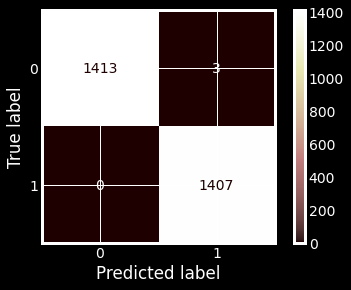

In [26]:
%%time
predictor(features, labels, 'lr', {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'newton-cg'})



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Support Vector Machine</h2>
</div>





Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Support Vector Machine on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1416    0]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 1.0
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

CPU times: user 194 ms, sys: 4.39 ms, total: 198 ms
Wall time: 195 ms


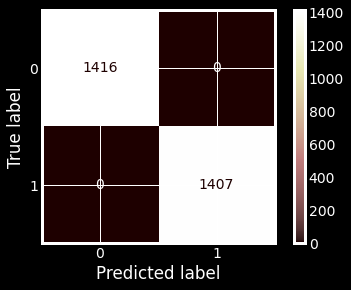

In [27]:
%%time
predictor(features, labels,'svm', {'C': .75, 'gamma': 0.2,
          'kernel': 'linear', 'random_state': 42},tune = False)



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training K-Nearest Neighnours</h2>
</div>






Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training K-Nearest Neighbours on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1416    0]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 1.0
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

CPU times: user 843 ms, sys: 10.1 ms, total: 854 ms
Wall time: 849 ms


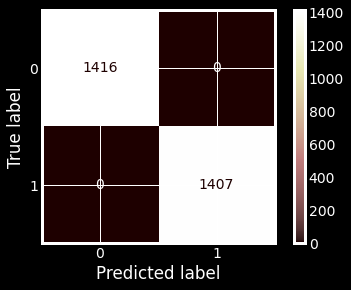

In [28]:
%%time
predictor(features, labels, 'knn', {'algorithm': 'kd_tree', 'n_jobs': 1, 'n_neighbors': 1, 'weights': 'uniform'})



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Decision Trees</h2>
</div>



Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Decision Tree Classifier on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1414    2]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 0.9992915338292596
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 99.87 %
Standard Deviation: 0.08 %
K-Fold Cross validation [ ✓ ]

CPU times: user 213 ms, sys: 2.6 ms, total: 215 ms
Wall time: 211 ms


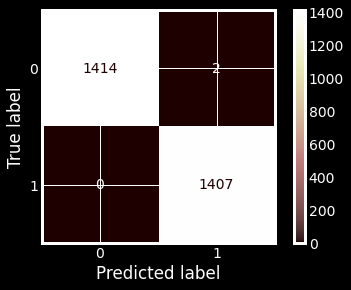

In [29]:
%%time
predictor(features, labels, 'dt', {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'splitter': 'best', 'random_state': 42})



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Gausian naive Bayes</h2>
</div>



Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Naive Bayes Classifier on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1416    0]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 1.0
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

CPU times: user 136 ms, sys: 2.82 ms, total: 139 ms
Wall time: 137 ms


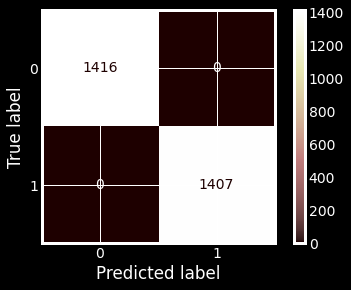

In [30]:
%%time
predictor(features, labels, 'nb', {})



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training Random Forest</h2>
</div>




Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training Random Forest Classifier on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1416    0]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 1.0
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

CPU times: user 7.51 s, sys: 35.5 ms, total: 7.54 s
Wall time: 7.54 s


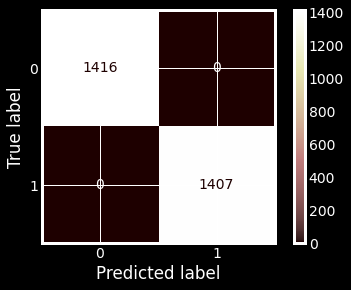

In [31]:
%%time
predictor(features, labels, 'rfc', {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 150,'random_state':0})



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h2 style="text-align:center;">Training XGBoost Classifier</h2>
</div>



Checking if labels or features are categorical! [*]

Labels are Categorical [*] 

Encoding Labels 

Encoding Labels Done [ ✓ ]

Applying SMOTE [*]

SMOTE Done [ ✓ ]

Splitting Data into Train and Validation Sets [*]

Splitting Done [ ✓ ]

Scaling Training and Test Sets [*]

Scaling Done [ ✓ ]

Training XGBClassifier on Training Set [*]

Model Training Done [ ✓ ]

Making Confusion Matrix [*]
[[1416    0]
 [   0 1407]]
Confusion Matrix Done [ ✓ ]

Evaluating Model Performance [*]
Validation Accuracy is : 1.0
Evaluating Model Performance [ ✓ ]

Applying K-Fold Cross validation [*]
Accuracy: 100.00 %
Standard Deviation: 0.00 %
K-Fold Cross validation [ ✓ ]

CPU times: user 13.6 s, sys: 53.8 ms, total: 13.7 s
Wall time: 13.7 s


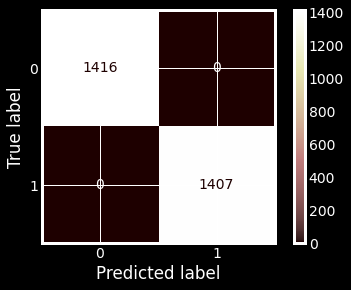

In [32]:
%%time
predictor(features, labels, 'xgb', {'learning_rate':0.02, 'n_estimators':600, 'objective':'binary:logistic', 'nthread':1,'eval_metric':'logloss'})



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Finding which model performed better</h1>
</div>


In [33]:
maxKey = max(accuracy_scores, key=lambda x: accuracy_scores[x])
print('The model with highest K-Fold Validation Accuracy score is  {0} with an accuracy of  {1:.2f}'.format(
    maxKey, accuracy_scores[maxKey]))

The model with highest K-Fold Validation Accuracy score is  SVC(C=0.75, gamma=0.2, kernel='linear', random_state=42) with an accuracy of  100.00


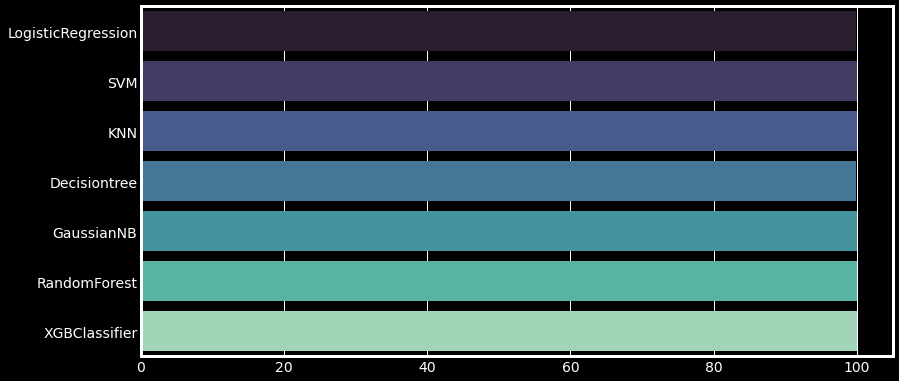

In [34]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = ['LogisticRegression', 'SVM','KNN', 'Decisiontree', 'GaussianNB', 'RandomForest','XGBClassifier']
sns.barplot(x=model_accuracies, y=model_names, palette='mako');



<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Summary</h1>
    <h2 style="text-align:center;"> All Models Performed almost close to 100 percent with validation data</h2>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Note: These functions applied above are created by me. If you you use them in any case don't forget to give credit to me. I have spent alot of time building them.</h1>
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:yellow;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold">Please give feedback by commenting below and If you liked my work please consider upvoting</h1>
</div>
